# Week 8: Build a Voice Changer/Voice Shield

<font size="6"> Laboratory 7 </font> <br>
<font size="3"> Last updated March 3, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

### Mathematics 
- N/A
    
### Programming Skills 
- flow structures (`try`/`finally`, `for`/`else`)
- Timing conflicts
- Buffers
    
### Embedded Systems 
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- Headphones

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib 

**Email:** pleib@purdue.edu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:orange;"> 1. Intro </span>

## <span style="color:orange;"> 1. Introduction </span>

In a previous lab, we learned about modulating signals and in later one, we learned how to capture and manipulate audio using python. That served as a good primer on how to manipulate audio in Python.  We now combine the ideas from the earlier laboratories to create a real-time voice changer. If the time taken for processing data is more than a few milliseconds, we will be forced to either skip sections of audio or have a substantial lag between input and output. In this lab, we will explore ways to minimize latency in producing the modulated output inorder to process the audio in realtime. But before that let us look into audio recordng and playback with Python.



## <span style="color:orange;"> 2. Audio Recorder </span>
We will be using PyAudio for making our voice changer
To explore more in detail about PyAudio and its features, you could refer the [API docementation for PyAudio](https://people.csail.mit.edu/hubert/pyaudio/docs/).

For Recording Audio with Python, we have to do the following:
1. Open a data stream to get audio data frame from microphone
2. Iterate over the stream and append each frame to a list of frames.
3. Stop and close the data stream.
4. Save the data frames as a .wave file.
5. Close and terminate the audio stream.

[Voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py) is implemented following the above pseudo code. It records 5s of mono channel audio and saves it as 'my_recording.wav'.


Let us go through the code in voice_recorder.py.
```
p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)
```

Here we are initializing an Audio stream. Since we enabled input as True, python will recognize this stream as an input audio stream.

```
for i in range(0, RATE//chunk * RECORD_SECONDS):

    frame = stream.read(chunk, exception_on_overflow = False)
    frames.append(frame)

```

This is the part where we read 'chunk' sized samples from the input audio stream.
These samples are then appended to a list. The list of samples can be saved as a wav file.


### <span style="color:red"> Exercise 1</span>

What role does ```exception_on_overflow = False``` do in ```frame = stream.read(chunk, exception_on_overflow = False)``` on [voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py)? Run the code after setting ```exception_on_overflow = True``` and report your observations. What does the result indicate ?

In [7]:
#!/usr/bin/env python

"""voice_recorder.py: As the name indicates, this code is used to record audio"""

__author__      = "Adharsh Sabukumar"



import pyaudio
import wave


chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 10
OUTPUT_FILE_NAME = "my_recording.wav"

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

frames = list()

print("*************************************")
print("*******   recording started   *******")

for i in range(0, RATE//chunk * RECORD_SECONDS):

    frame = stream.read(chunk, exception_on_overflow = False)
    frames.append(frame)


print("******   recording completed   ******")
print("*************************************")


stream.stop_stream()
stream.close()
p.terminate()

print("----  saving audio as .wav file  ----")
print("*************************************")

file = wave.open(OUTPUT_FILE_NAME, 'wb')
file.setnchannels(CHANNELS)
file.setsampwidth(p.get_sample_size(FORMAT))
file.setframerate(RATE)
file.writeframes(b''.join(frames))
file.close()

*************************************
*******   recording started   *******
******   recording completed   ******
*************************************
----  saving audio as .wav file  ----
*************************************


All the argument does is toggle if an IOError should be thrown or not when the stream is overflowed

## <span style="color:orange;"> 2. Audio Player </span>

The idea behind the implementation of an audio player is similar but opposite to that of an audio recorder.
Since we have the audio file saved in some format, a naive approach would be to load the audio as a single numpy array and play it using Audio() function.

But this approach is not an optimal solution when dealing with huge files.

So a good approach will be to read smaller chunks at a time from the audio file, so that we do not exhaust our total system memory.

The Pseudo code for the audio recording using python and PyAudio is as follows:

1. Initialize and open an output audio stream.
2. Iterate and read frames of data from the audio file.
3. Write the data frames to the output stream.
4. Close and terminate the audio stream.

[Audio_player.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/audio_player.py) is implemented following the above pseudo code.

### <span style="color:red"> Exercise 2</span>

Record a 10s audio clip using [voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py) and then play the 10s audio using [audio_player.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/audio_player.py). Report your observations.

In [8]:
import pyaudio
import wave

filename = 'my_recording.wav'

# Sample size per audio frame
chunk = 1024  

# open audio file
wf = wave.open(filename, 'rb')

p = pyaudio.PyAudio()

# initialize an audio output stream.

stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# read data in chunks
data = wf.readframes(chunk)

print("*************************************")
print("*******   playback started!   *******")

while data != b'':
    stream.write(data)
    data = wf.readframes(chunk)

print("*************************************")
print("*******   finished playback   *******")


stream.close()
p.terminate()

*************************************
*******   playback started!   *******
*************************************
*******   finished playback   *******


The playback is pretty good, it is audible and only 1 channel but it gets the job done. Seems pretty quick to process as it starts playing right as the code runs.

## <span style="color:orange;"> 3. Megaphone - a Pythonic Approach </span>

A megaphone is a portable, cone-shaped device used to amplify a person's voice. It is a simple device to amplify input sounds in realtime. In this exercise we will be using python to implememt a Megahorn in realtime.

To implement such a device, we follow these steps:
1. Initialize and open an input and output stream.
2. Read frames from the input stream.
3. Write the frames from the input stream to the output stream.
4. Close and terminate the data streams.

[Megaphone.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/megaphone.py) is implemented following the steps above.


### <span style="color:red"> Exercise 3</span>

Run [Megaphone.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/megaphone.py) and report your observations. How well does this program perform when you are not using headphones? Report your observations.

In [9]:

#!/usr/bin/env python

"""megaphone.py: Captures audio using microphone and outputs through a speaker in almost real time.
This code illustrates how to gather audio data as chunk and to act on it."""

__author__      = "Adharsh Sabukumar"

import pyaudio
import sys
import numpy as np
import wave
import audioop
import struct
import scipy.fftpack as fft

chunk = 512
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 41000
RECORD_SECONDS = 5

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                output = True,
                frames_per_buffer = chunk)
swidth = 2


while(True):

    data = stream.read(chunk, exception_on_overflow = False)
    data = np.array(wave.struct.unpack("%dh"%(len(data)/swidth), data))


    chunkout = struct.pack("%dh"%(len(data)), *list(data)) #convert back to 16-bit data

    stream.write(chunkout, chunk)




print ("* done")

stream.stop_stream()
stream.close()
p.terminate()

KeyboardInterrupt: 

That was actually really cool. I didn't realize what it was doing at first but that processed the audio very quickly. Without headphones you start to get a lot of positive feedback, when the microphone picks up the audio coming out of the speakers and amplifies it again. This can obviously be remedied by using headphones which isolates the speakers from the microphone.

## <span style="color:orange;"> 4. Voice Changer </span>

Voice changers are one of those gadgets that you might have seen in spy movies or as a part of Halloween costumes. 

When you speak, your throat produces a vibration which travels as a wave. Essentially,
your voice is a sound wave. A voice changer, changes the shape of this sound wave by altering it. This can be done in multiple ways.

One of the ways to implement a voice changer is to find out the frequency components of your voice and replace those frequency components with another frequency. However this is computationally expensive and will require specialized hardware to run the operation in realtime.

A simple way to do this is to multiply the received audio signal with a wave of known frequency. This will shift the frequency components of the signal altering your voice.

To implement such a device, we will do the following:
1. Initialize and open an input and output stream.
2. Read frames from the input stream.
3. Multiply each such audio frames with a wave of known frequency.
4. Write these modified audio frames to the output stream.
5. Close and terminate the data streams.

[Real_time_voice_changer.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/real_time_voice_changer.py) is implemented using this approach.



### <span style="color:red"> Exercise 4</span>

Run [Real_time_voice_changer.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/real_time_voice_changer.py) and report your observations.
Identify the shape and frequency of the wave used in altering the input.

In [ ]:
#!/usr/bin/env python

"""real_time_voice_changer.py: As the name indicates, this code changes your voice in realtime"""

__author__      = "Adharsh Sabukumar"



import pyaudio
import sys
import numpy as np
import wave
import audioop
import struct
import scipy.fftpack as fft

chunk = 253 * 3
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 41000
RECORD_SECONDS = 5

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                output = True,
                frames_per_buffer = chunk)
swidth = 2

y = 2**4*np.sin(np.linspace(0, 6*np.pi, chunk, endpoint=False))

while(True):

    data = stream.read(chunk, exception_on_overflow = False)
    data_length = len(data)
    data = np.array(wave.struct.unpack("%dh"%(data_length/swidth), data))
    data_length = data_length//swidth

    data = np.multiply(y,data).astype(np.int16)

    #print(data)

    chunkout = struct.pack("%dh"%(data_length), *list(data)) #convert back to 16-bit data
    stream.write(chunkout, chunk)


print ("* done")

stream.stop_stream()
stream.close()
p.terminate()

This program seemed to be slower at processing the audio channel, however this makes sense because it was also manipulating the audio which requires more calculations and time. My voice was definitely altered in the output and sounded very electronic. The wave used to modulate my voice was a sinusoid with frequency 1Hz.

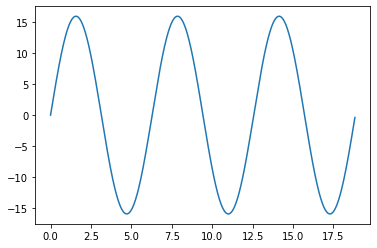

In [16]:
x = np.linspace(0, 6*np.pi, 759, endpoint=False)
y = 2**4*np.sin(np.linspace(0, 6*np.pi, 759, endpoint=False))

import matplotlib.pyplot as plt

plt.plot(x,y)

### <span style="color:red"> Exercise 5</span>

Change the shape of the waveform used in [Real_time_voice_changer.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/real_time_voice_changer.py). Report your code and observations.  


In [1]:
import numpy as np

def square(freq, n):
    """
    freq = frequency of the triangle wave
    n = the length of the wave in seconds
    """
    t = np.linspace(0, 6*np.pi, n, endpoint = False)
    x = np.sin(freq * t)
    return np.sign(x)

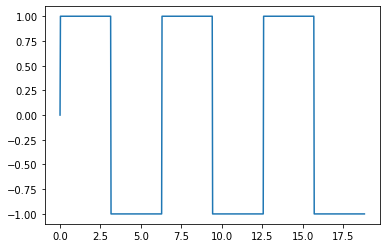

In [15]:
plt.plot(x, square(1, 759))

In [ ]:
#!/usr/bin/env python

"""real_time_voice_changer.py: As the name indicates, this code changes your voice in realtime"""

__author__      = "Adharsh Sabukumar"



import pyaudio
import sys
import numpy as np
import wave
import audioop
import struct
import scipy.fftpack as fft

chunk = 253 * 3
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 41000
RECORD_SECONDS = 5

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                output = True,
                frames_per_buffer = chunk)
swidth = 2

y = 2**4*square(4, chunk)

while(True):

    data = stream.read(chunk, exception_on_overflow = False)
    data_length = len(data)
    data = np.array(wave.struct.unpack("%dh"%(data_length/swidth), data))
    data_length = data_length//swidth

    data = np.multiply(y,data).astype(np.int16)

    #print(data)

    chunkout = struct.pack("%dh"%(data_length), *list(data)) #convert back to 16-bit data
    stream.write(chunkout, chunk)


print ("* done")

stream.stop_stream()
stream.close()
p.terminate()


The square wave I used in this one seemed to produce a much muddier output than the sine wave. Not sure if it was picking up a lot of noise or what, but definetely a different output.

### <span style="color:red"> Exercise 6</span>

How does [Real_time_voice_changer.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/voice_changer/real_time_voice_changer.py) perform when you:
1. increase the frequency of the input altering wave?
2. decrease the frequency of the input altering wave?


1. when I increase the frequency of the modulation wave the output becomes increasingly harder to make out. It almost sounds like all the sounds are getting squished together and output quicker.
2. As I decrease the frequency of the altering wave, I can make out the input sounds but can also tell they have been modulated.

## <span style="color:green;"> Reflection </span>

Do not skip this section! Lab will be graded only on completion of this section.

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I think I was able to modify the given code pretty well to accomplish the tasks that were asked.
2. I learned the general relationship between modulated waveforms and their inputs, as well as how to build real time audio processors.
3. I think maybe the code was a little advanced but I'd like to know more about how the real time processing is accomplished.
4. NOt necessarily, this one was nice and fun to play with.